## Exploratory data analysis exercise on 2020 CDC BRFSS data - Predicting Diabetes project.



In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import thinkstats2
import thinkplot
import scipy.stats
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf

In [ ]:
# Reading the 2020 BRFSS file saved to the working directory.
brfss = pd.read_csv("brfss2020.csv")

In [ ]:
# Finding the shape of the dataframe and the total number of records = 401958 records and 279 variables
brfss.shape

(401958, 279)

## Data Preparation/Cleaning

In [ ]:
# Collecting the variables I want into a smaller file
df = brfss[['DIABETE4','GENHLTH','SEXVAR','_IMPRACE', '_BMI5CAT',  '_BMI5', '_AGE80', '_TOTINDA', 'MARITAL', '_CHLDCNT',
           'HLTHPLN1', '_INCOMG', 'PERSDOC2', 'CHECKUP1', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', '_DRDXAR2',
           'ADDEPEV3', 'CHCKDNY2', '_MICHD', '_RFSMOK3', 'DRNKANY5', '_RFDRHV7']]

In [ ]:
# Inspecting the file initially to look at the data and how it's pulling in and formatted.
df.head()
# Renaming the column names to something more usable.
df = df.rename(columns={'DIABETE4': 'diabetes', 'GENHLTH': 'health_status', 'SEXVAR': 'sex', '_IMPRACE': 'race', '_BMI5CAT': 'weight',
                        '_BMI5': 'bmi_num', '_AGE80': 'age', '_TOTINDA': 'activity', 'MARITAL': 'marital', '_CHLDCNT': 'children',
                        'HLTHPLN1': 'insured', '_INCOMG': 'income', 'PERSDOC2': 'havePCP', 'CHECKUP1': 'routinecheckup',
                        'CVDSTRK3': 'stroke', 'ASTHMA3': 'asthmaever', 'CHCSCNCR': 'skin_cancer', 'CHCOCNCR': 'other_cancer',
                        'CHCCOPD2': 'copd', '_DRDXAR2': 'arthritis', 'ADDEPEV3': 'depression', 'CHCKDNY2': 'kidney_disease',
                        '_MICHD': 'heart_disease', '_RFSMOK3': 'smoker', 'DRNKANY5': 'drinks', '_RFDRHV7': 'heavy_drinker'})
df.head()

,diabetes,health_status,sex,race,weight,bmi_num,age,activity,marital,children,...,skin_cancer,other_cancer,copd,arthritis,depression,kidney_disease,heart_disease,smoker,drinks,heavy_drinker
0,1.0,2.0,2.0,1.0,1.0,1660.0,56.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
1,3.0,3.0,2.0,2.0,3.0,2918.0,65.0,1.0,3.0,1.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,9.0,9.0,9.0
2,3.0,3.0,2.0,2.0,NaN,NaN,65.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0
3,3.0,1.0,2.0,1.0,NaN,NaN,80.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
4,3.0,2.0,2.0,1.0,2.0,2034.0,80.0,1.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0


In [ ]:
# Looking for missing values for any of the health data as they will likely not be used as well.
df.isnull().sum()

diabetes              6
health_status         8
sex                   0
race                  0
weight            41357
bmi_num           41357
age                   0
activity              0
marital              12
children              0
insured               3
income                0
havePCP               3
routinecheckup        5
stroke                3
asthmaever            3
skin_cancer           3
other_cancer          3
copd                  5
arthritis          2303
depression            6
kidney_disease        6
heart_disease      3571
smoker                0
drinks                0
heavy_drinker         0
dtype: int64

In [ ]:
# Removing those with missing data.
df = df.dropna()
df.shape

(355989, 26)

Removed over 41,000 respondents mostly for missing a calculated BMI and a few other variables.

In [ ]:
# Diabetes, according to the BRFSS codebook is 1=Yes and 2 to 4 varying degrees
# no.  Codes 7 to 9 need to be dropped as they are DK or RF.
# Deleting the 7's and 9's
df = df[(df.diabetes < 5)]
# Adding codes to categorical variables with strings so the data can be formatted more nicely into plots.
df.health_status.replace((1, 2, 3, 4, 5, 7, 9), ('excellent', 'very good', 'good', 'fair', 'poor', 'dkrf' , 'dkrf'), inplace=True)
df.sex.replace((1, 2), ('male', 'female'), inplace=True)
df.race.replace((1, 2, 3, 4, 5, 6), ('whiteNH', 'blackNH', 'asianNH', 'nativeNH', 'hispanic', 'otherNH'), inplace=True)
df.weight.replace((1, 2, 3, 4), ('underweight', 'normal', 'overweight', 'obese'), inplace=True)
df.diabetes.replace((1, 2, 3, 4), ('Yes', 'Gestational Only', 'No', 'Pre-diabetes'), inplace=True)
df.marital.replace((1, 2, 3, 4, 5, 6, 9), ('married', 'divorced', 'widowed', 'separated', 'never', 'couple', 'rf'), inplace=True)
df.children.replace((1, 2, 3, 4, 5, 6, 9), ('none', 'one', 'two', 'three', 'four', 'fiveplus', 'dkrf'), inplace=True)
df.income.replace((1, 2, 3, 4, 5, 9), ('<15', '15to24', '25to34', '35to50', '50plus', 'dkrf'), inplace=True)
df.routinecheckup.replace((1, 2, 3, 4, 7, 8, 9), ('pastyr', 'past2yr', 'past5yr', '5plus', 'dkrf', 'never', 'dkrf'), inplace=True)
df.head()

,diabetes,health_status,sex,race,weight,bmi_num,age,activity,marital,children,...,skin_cancer,other_cancer,copd,arthritis,depression,kidney_disease,heart_disease,smoker,drinks,heavy_drinker
0,Yes,very good,female,whiteNH,underweight,1660.0,56.0,1.0,divorced,none,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
1,No,good,female,blackNH,overweight,2918.0,65.0,1.0,widowed,none,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,9.0,9.0,9.0
4,No,very good,female,whiteNH,normal,2034.0,80.0,1.0,widowed,none,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
5,Yes,fair,male,whiteNH,overweight,2658.0,66.0,1.0,separated,none,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0
6,No,good,female,whiteNH,normal,2421.0,75.0,2.0,married,none,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0


## Variable selection for indepth exploration.

The five variables I'm selecting are diabetes (Yes = 1, No = 0), activity level (Yes = 1, No = 0),bmi_num (times 100 to get rid of decimals for reporting purposes), age (capped at 80 by CDC), and health status (ordinal from 1=Excellent Health to 5=Poor health).   Diabetes was originally coded as1=Yes, 2=Prediabetic, 3=Only gestational diabetes and 4=No.   I will recode it to be 1=Yes and 2 through 4=No.  Activity level asks if they have had any leisure-time physical activity in the past few days.  The two answering possibilities are Yes (code 1) and No (recoded to 0).  Inactiveness can definitely contribute to health issues and obesity, both of which are known to affect the body's transition to Type 2 diabetes.  Bmi_num is the calculation of body mass index based on metric weight and height.  This variable is multiplied by 100 to make it easier for reporting programs which prefer whole numbered codes.  Age is the age of the respondent and is capped at 80 (so anyone answering over 80 years old is coded as 80).  Health status is a measure of self-perceived health status with options of excellent health, very good health, good health, fair health or poor health.   The hope is that those who aren't in good health would be able to recognize that and respond accordingly but past experience has shown that many who are obese tend to respond that they are in very good or better health.

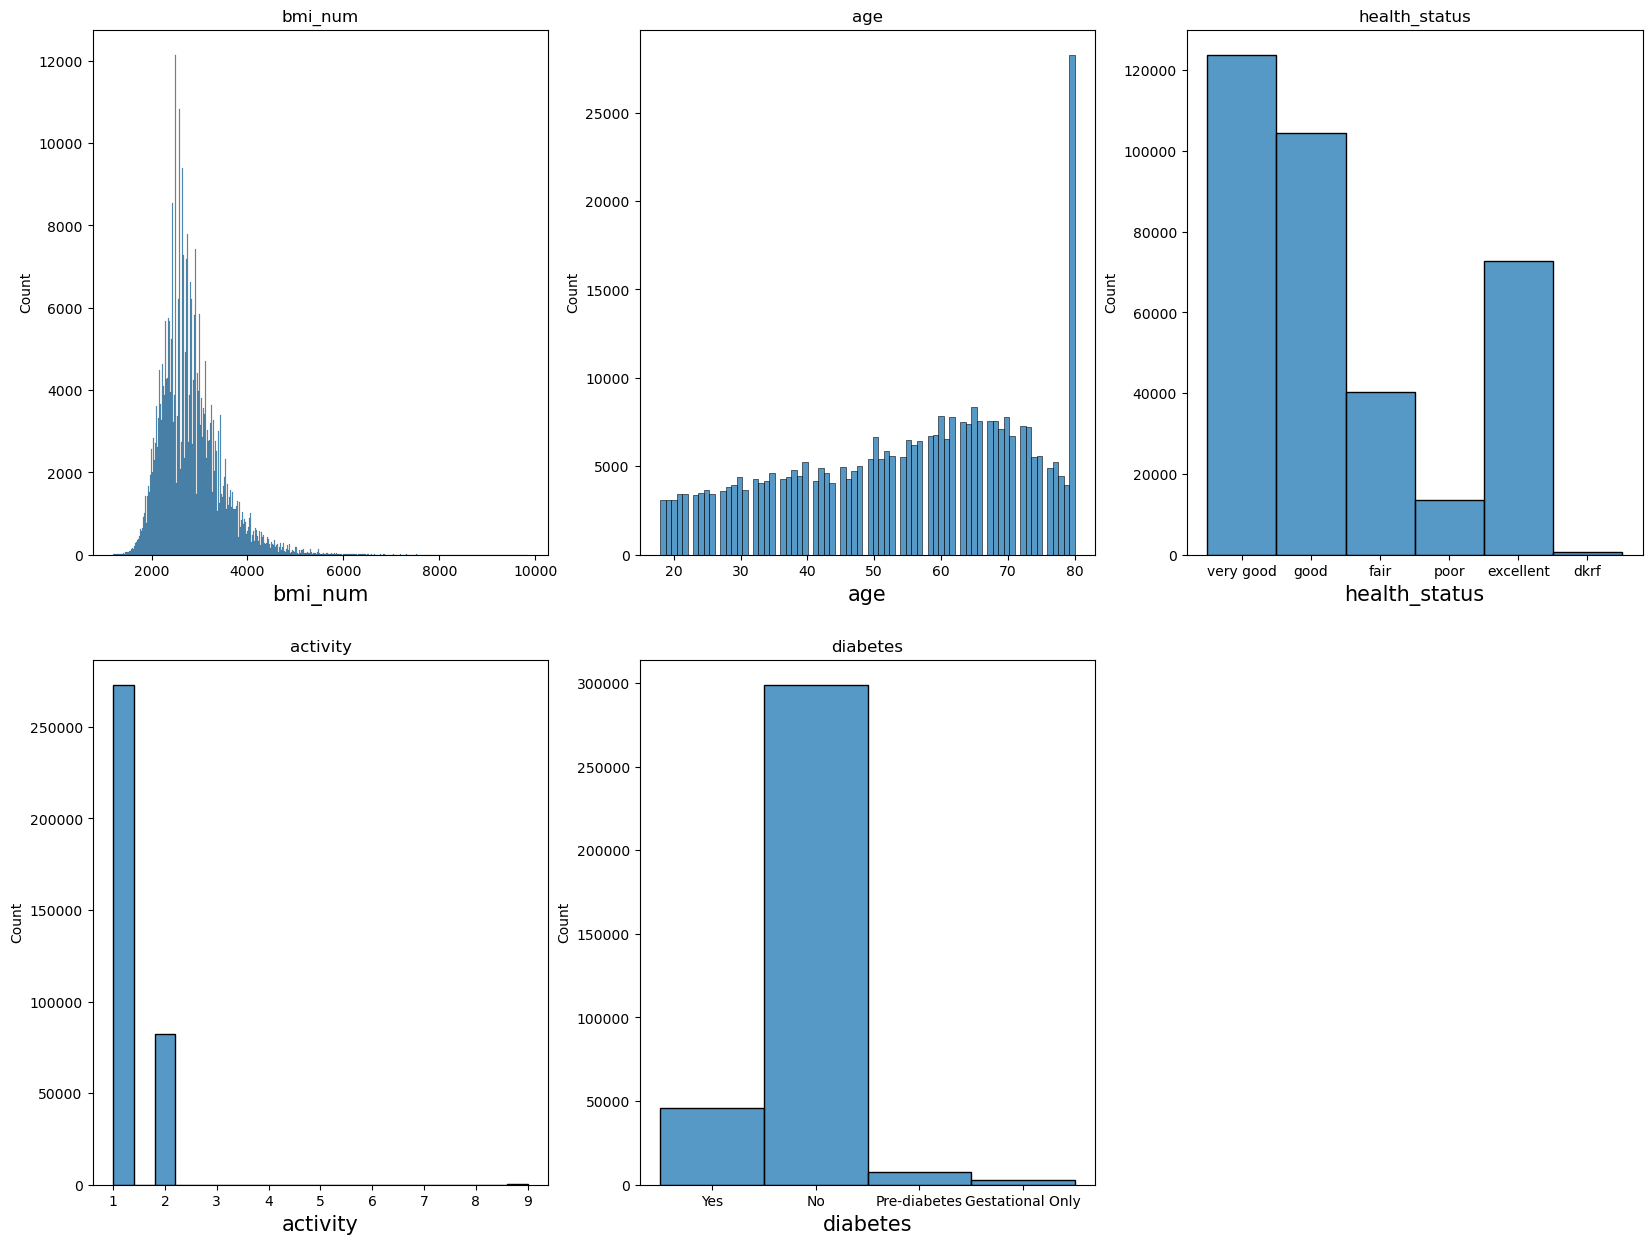

In [ ]:
# Histogram of each of the five variables.
# Plotting the histograms of all the variables to see distribution
cols = ["bmi_num", "age", "health_status", "activity", "diabetes"]
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)
    plt.title(col)

No outliers are found to exist in bmi_num, in fact, I would say the CDC possibly removed some of the higher bounds of BMI, assuming that the data is faulty (improperly entered height and/or weight, rather than allow it to stay).  BMI ranges in the high end of 20-100 are more likely with the advent of super morbidly obese persons.  The CDC also handed the upper range of age, truncating any age over 80 to 80.  If I were cleaning this data I likely would have allowed ages to 100 and then removed the age any higher than that, not recode it to a different number.  It's more likely to be an interviewer input error than a person over 80/100 inaccurately entering in their age.  Health status also doesn't have any outliers.   Normally I think that I would removed don't know or refused from the dataframe; however, in the realm of health status, not knowing or refusing to say your health status is likely due, in part, to improper care or evaluating your own health, or refusing to say because you are ashamed of the answer so I'm leaving them in as a likely less than good health possibility and see how they behave as a group.  Activity level codes 7 and 9 are either DK or RF but I'm going to clear these out as they don't have any good reason to stay in.  Diabetes also doesn't have any outliers but I'm going to recode No, Pre-Diabetes, and Gestational Only to No.  I thought about coding Pre-diabetes as Yes, but I think this will muddy the waters of the group I'm most interested in (those who have diabetes now).


In [ ]:
# Recoding diabetes to Yes, No
# Function to recode based on desired value (1).
def desired (cell):
    if cell == 'Yes':
        return 'Yes'
    elif cell == 'No':
        return 'No'
    elif cell == 'Gestational Only':
        return 'No'
    elif cell == 'Pre-diabetes':
        return 'No'
    else:
        return 'NaN'
# Recoding diabetes
df['diabetes'] = df['diabetes'].apply(desired)
# Removing those who don't have an answer for leisure-time physical activity
df = df[(df.activity !=9)]
df.activity.replace((1, 2), ('Active', 'Inactive'), inplace=True)

In [ ]:
# Descriptive characteristics of each of the 5 variables (mean, mode, spread,
# and tails)
num_cols = ["bmi_num", "age"]
df[num_cols].describe()

,bmi_num,age
count,355145.000000,355145.000000
mean,2830.056929,54.543640
std,637.169679,17.725553
min,1202.000000,18.000000
25%,2399.000000,40.000000
50%,2732.000000,57.000000
75%,3138.000000,69.000000
max,9843.000000,80.000000


In [ ]:
print('The average BMI is:', round(df['bmi_num'].mean())/100,0)
print('The mode of BMI is:', df['bmi_num'].mode()/100)
print('The kurtosis value of BMI is:', df['bmi_num'].kurtosis())
print('The skewness of BMI is:', df['bmi_num'].skew())

The average BMI is: 28.3 0
The mode of BMI is: 0    26.63
Name: bmi_num, dtype: float64
The kurtosis value of BMI is: 4.166002609143532
The skewness of BMI is: 1.3609940177760897


In [ ]:
print('The average age is:', round(df['age'].mean()),0)
print('The mode of age is:', df['age'].mode())
print('The kurtosis value of age is:', df['age'].kurtosis())
print('The skewness of age is:', df['age'].skew())

The average age is: 55 0
The mode of age is: 0    80.0
Name: age, dtype: float64
The kurtosis value of age is: -0.983827093939154
The skewness of age is: -0.3362974441197244


Neither age nor bmi is normally distributed (more Americans are overweight and older Americans tend to take these surveys which is why they are generally weighted by sex, age, race, and income level as well as other factors).  The average BMI is roughly (28.3 while the mode often reported BMI is 26.63).  The average age is 55 while the most frequent age is 80 (as expected due to the cap).  Bmi is a little positively skewed (1.36) while age is a little less negatively skewed (partially due to the age requirements that a person be 18 to take a survey and all ages above 80 were capped at 80).  BMI is high on kurtosis (a normal distribution should be around 3 and it's 4.17) while age is relatively flat (-.98).  

C:\Users\kouba\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


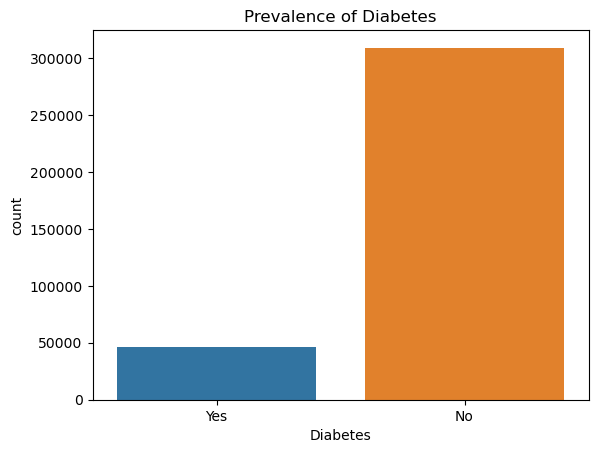

In [ ]:
# Because three of the variables are yes/no boolean variables I'll give a bar chart showing the
# prevalence of each in the data.
# Bar chart of diabetes
y = df.diabetes
legend = ['Yes', 'No']
sns.countplot(y)
bars = ('Yes', 'No')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Diabetes')
plt.title('Prevalence of Diabetes')
plt.show()

C:\Users\kouba\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


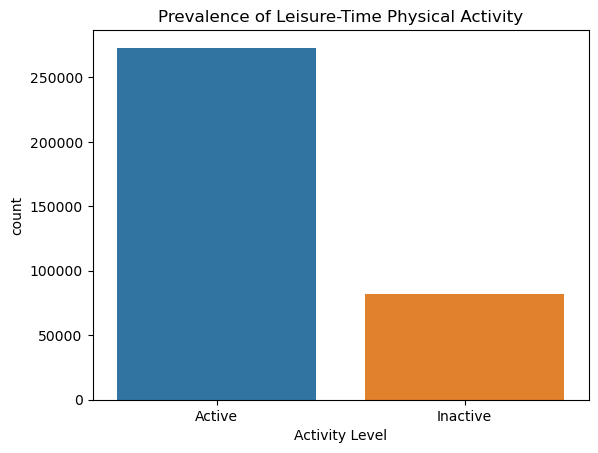

In [ ]:
# Bar chart of Activity Level
y = df.activity
legend = ['Active', 'Inactive']
sns.countplot(y)
bars = ('Active', 'Inactive')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Activity Level')
plt.title('Prevalence of Leisure-Time Physical Activity')
plt.show()

C:\Users\kouba\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


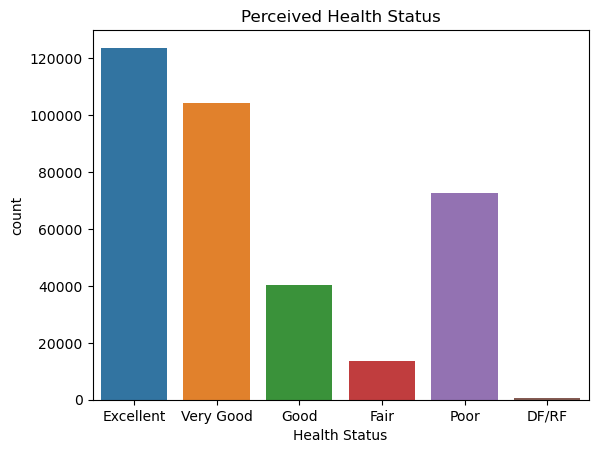

In [ ]:
# Bar chart of Health Status
y = df.health_status
sns.countplot(y)
bars = ('Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'DF/RF')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Health Status')
plt.title('Perceived Health Status')
plt.show()

In [ ]:
#Find all the categorical variables
categorical_columns = ["health_status", "activity", "diabetes"]

#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    #Printing frequencies
    print(df[col].value_counts())
    #Printing percentages
    print(df[col].value_counts(normalize = True)*100)


Frequency of Categories for variable health_status
very good    123722
good         104204
excellent     72786
fair          40327
poor          13462
dkrf            644
Name: health_status, dtype: int64
very good    34.837038
good         29.341255
excellent    20.494728
fair         11.355080
poor          3.790564
dkrf          0.181334
Name: health_status, dtype: float64

Frequency of Categories for variable activity
Active      273004
Inactive     82141
Name: activity, dtype: int64
Active      76.871137
Inactive    23.128863
Name: activity, dtype: float64

Frequency of Categories for variable diabetes
No     309091
Yes     46054
Name: diabetes, dtype: int64
No     87.032339
Yes    12.967661
Name: diabetes, dtype: float64


The unweighted prevalence of diabetes in the sample is nearly 13% with 46054 persons having diabetes in a sample of 355,145.  The prevalence of active persons in the sample is nearly 77%, which is much higher than expected.  Over 20% of persons reported excellent health, while roughly 64% (or 2 in 3) reported very good or good health.   Conversely, roughly 15% reported either fair or poor health with almost 4% saying poor health.

In [ ]:
#Evaluating bmi distribution by diabetes
sns.countplot(x=df['weight'],data=df, hue ="diabetes")
bars = ('Underweight', 'Healthy Weight', 'Overweight', 'Obese')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Weight Status')
plt.legend(legend)
plt.title('Diabetes vs Weight Status')
plt.figure(figsize=(10,10))

## Creating PMF distributions of BMI

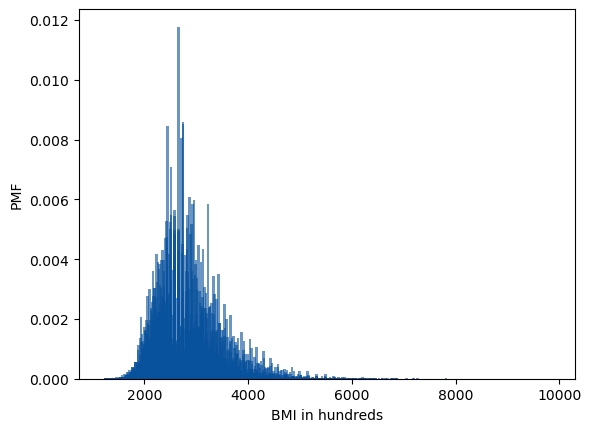

In [ ]:
#Creating a PMF of BMI among diabetics vs non-diabetics.
#Splits dataframe into diabetics and not
diabetic_df = df[df.diabetes == "Yes"]
not_df = df[df.diabetes != "Yes"]
# BMIs of diabetics and non-diabetics
diabetics_BMI = diabetic_df.bmi_num
not_BMI = not_df.bmi_num
# Creating a pmf distribution of diabetics' BMI
diabetes_pmf = thinkstats2.Pmf(diabetics_BMI, label = 'diabetic')
# Creating a pmf distribution of non-diabetics' BMI
not_pmf = thinkstats2.Pmf(not_BMI, label = 'non-diabetic')

# Creating a PMF distribution of all respondents' BMI
all_pmf = thinkstats2.Pmf(df.bmi_num)
thinkplot.PrePlot(2)
thinkplot.Hist(all_pmf, width = 50)
thinkplot.Config(xlabel = 'BMI in hundreds', ylabel = 'PMF')

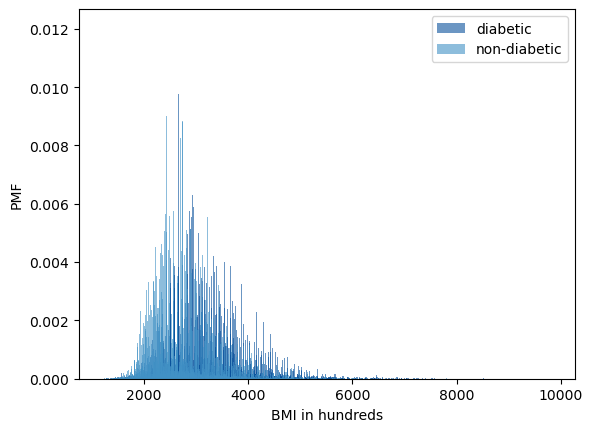

In [ ]:
# Creating a PMF distribution of diabetics' vs. non-diabetics BMI
thinkplot.PrePlot(2)
thinkplot.Hist(diabetes_pmf, align = 'left', width = 10)
thinkplot.Hist(not_pmf, align = 'right', width = 10)
thinkplot.Config(xlabel = 'BMI in hundreds', ylabel = 'PMF')

Looking at the PMF, diabetics are more likely to have higher BMIs when compared to non diabetics.   This can also be confirmed and more easily seen the bar chart below with the categorical BMI status (intervals set by the CDC), especially among the obese.

C:\Users\kouba\AppData\Local\Temp\ipykernel_26540\1876855588.py:7: UserWarning: Legend does not support 'Y' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Yes", "No")
C:\Users\kouba\AppData\Local\Temp\ipykernel_26540\1876855588.py:7: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Yes", "No")


<Figure size 1000x1000 with 0 Axes>

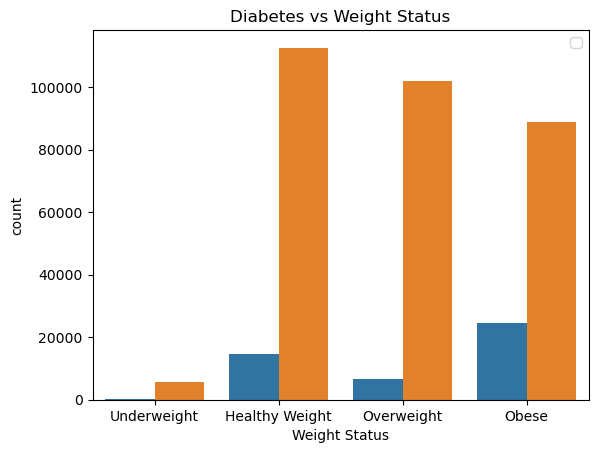

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#Evaluating bmi distribution by diabetes
sns.countplot(x=df['weight'],data=df, hue ="diabetes")
bars = ('Underweight', 'Healthy Weight', 'Overweight', 'Obese')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars)
plt.xlabel('Weight Status')
plt.legend("Yes", "No")
plt.title('Diabetes vs Weight Status')
plt.figure(figsize=(10,10))


## Creating CDF Distributions of BMI

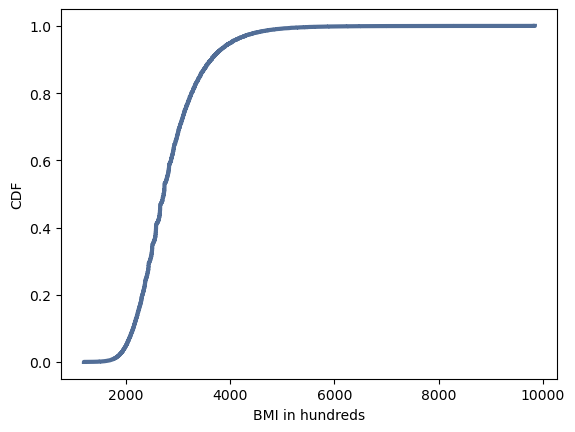

<Figure size 800x600 with 0 Axes>

In [ ]:
# Creating a CDF distribution of BMI
total_cdf = thinkstats2.Cdf(df.bmi_num)
#Plotting the CDF of BMI of all respondents
thinkplot.Cdf(total_cdf)
thinkplot.Show(xlabel='BMI in hundreds', ylabel = 'CDF')


This CDF plot shows that roughly 100% of the population is at 60.0 BMI or below.   This also shows that the majority of the respondents in the sample are over the healthy weight designation of 24.9 or lower.

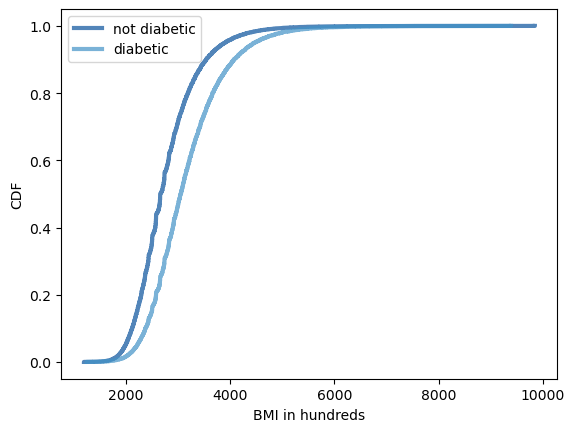

<Figure size 800x600 with 0 Axes>

In [ ]:
# Plotting an analytical distribution
# Comparing the CDF of BMIs of diabetics and non-diabetics
diabetic_cdf = thinkstats2.Cdf(diabetic_df.bmi_num, label = 'diabetic')
not_cdf = thinkstats2.Cdf(not_df.bmi_num, label = 'not diabetic')
thinkplot.PrePlot(2)
thinkplot.Cdfs([not_cdf, diabetic_cdf])
thinkplot.Show(xlabel='BMI in hundreds', ylabel = 'CDF')

The above CDF graph of BMI shows that as the BMI in a person goes up, the likelihood that they will be diagnosed with diabetics is higher.  In other words, at any BMI over a healthy range, diabetics are more likely to be diagnosed the higher the BMI goes, and at some point, diabetes is inevitable. 100% of the non-diabetic population is roughly under 40.0 BMI (not morbidly obese) while roughly 10% of diabetics are over that BMI.  Furthermore, very few diabetics are under the healthy weight designation of 24.9 (looks to be roughly 10%).

## Exploring the Relationship between Age by BMI

Text(0.5, 1.0, 'Age vs BMI')

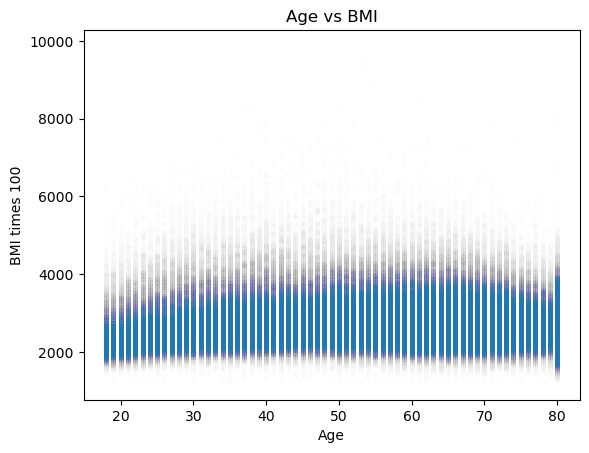

In [ ]:
# I chose to analyse age vs BMI as those are the only two continuous variables in my datafile that I feel are of importance to
# diabetes.   As we get older, it's more likely that we will acquire diabetes, and as we get heavier, we are also more likely to
# acquire diabetes.  A decision tree analysis though shows that the BMI threshold for acquiring diabetics is dependent on age,
# implying that staying at a lower but unhealthy weight for longer can have just as negative an impact as an older person gaining
# a lot of weight.
# Plotting the relationship between age and weight to see if they are
# heavily intercorrelated and if so, it's a linear relationship.
plt.scatter(df.age, df.bmi_num, s=10, alpha=0.005)
plt.xlabel('Age')
plt.ylabel('BMI times 100')
plt.title('Age vs BMI')

Given the amount of data, a scatterplot is incredibly busy so I tried hard toconfigure it given the data.  It does look as if younger persons have less variance in their BMI ranges and have lower BMIs in general.  Given that the variance is correlated to the line (it expands as the age increases) Pearson's R won't be the greatest fit and a non-linear option might be a better choice.

Text(0.5, 1.0, 'Age vs BMI in Diabetics')

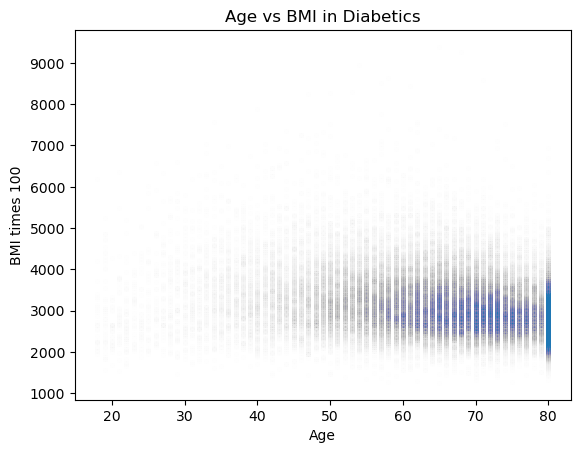

In [ ]:
# My second scatterplot is the same scatterplot but just among diabetics
# since I have no other continuous variables.
plt.scatter(diabetic_df.age, diabetic_df.bmi_num, s=10, alpha=0.005)
plt.xlabel('Age')
plt.ylabel('BMI times 100')
plt.title('Age vs BMI in Diabetics')

This plot is very telling for it shows that the diagnosis in younger adults under 40 is very rare and also that BMI tends to decrease among diabetics over time showing they might be trying to properly care for themselves and lose weight (or that diabetes or some other factor such as medicine is causing them to lose weight).

## Exploring the Relationship with other Variables between Diabetics and Non-Diabetics

In [ ]:
print("For the total sample, the Pearson's correlation is", stats.pearsonr(df.age, df.bmi_num), "and the Spearman's correlation is", stats.spearmanr(df.age, df.bmi_num))

For the total sample, the Pearson's correlation is PearsonRResult(statistic=-0.0028012034024985895, pvalue=0.0950484784914257) and the Spearman's correlation is SpearmanrResult(correlation=0.002596096834682385, pvalue=0.1218352200465132)


In [ ]:
print("For diabetics, the Pearson's correlation is", stats.pearsonr(diabetic_df.age, diabetic_df.bmi_num), "and the Spearman's correlation is", stats.spearmanr(df.age, df.bmi_num))

For diabetics, the Pearson's correlation is PearsonRResult(statistic=-0.21732683330843883, pvalue=0.0) and the Spearman's correlation is SpearmanrResult(correlation=0.002596096834682385, pvalue=0.1218352200465132)


Spearman's r assumes normality while Pearson does not so we will be focusing more on Pearson's r.  In the total sample, there is no correlation between age and bmi (nearly 0.0) and the Spearman r is similar as well.   Among diabetics, there is a slightly negative correlation as discussed earlier (-.22 = Pearson r), which we will focus on due to non-normal data.  It's unlikely that aging only makes diabetics lose weight so it's not likely that correlation proves causation in this instance (as it rarely does and other hypothesis testing should be used to confirm causation).  It's more likely the diabetes itself, the medication used to help diabetics take control of their eating and weight, as well as other factors at play.  

In [ ]:
# Finding the covariance between age and bmi_num
# Function that calculates covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx=np.mean(xs)
    if meany is None:
        meany=np.mean(ys)
    cov = np.dot(xs - meanx, ys - meany) / len(xs)
    return cov
print('The covariance between age and BMI is:', Cov(df.age, df.bmi_num))

The covariance between age and BMI is: -31.637219479191298


Covariance is the measure of two variables (age and BMI) to vary together.  Given that BMI is in the hundreds, a covariance of -31.6 doesn't seem that high.

In [ ]:
# I will be testing the null hypothesis that diabetics' mean BMI is similar to non-diabetics BMI.
diabetics_bmi = np.array(diabetic_df.bmi_num)
not_bmi = np.array(not_df.bmi_num)
# Printing the variance of both groups to see equal variance
print(np.var(diabetics_bmi),np.var(not_bmi))


509951.6297867689 371257.06242037436


The variance is less than a 4:1 (closer to 2:1) so equal variance can be set to true.

In [ ]:
stats.ttest_ind(a=diabetics_bmi, b=not_bmi, equal_var=True)

Ttest_indResult(statistic=123.59171769502073, pvalue=0.0)

The two-sample t-test proved that the mean of the BMIs between diabetics and non-diabetics is statistically different (p=0.00 that they are the same).  A look at the means in the graphs above show then that diabetics in general have a higher BMI when compared to non-diabetics.

## Predicting BMI through Multiple Regression

In [ ]:
# Running a OLS regression on BMI
# Running an OLS regression model predicting BMI based on age, activity level, health status and race.
model = smf.ols('bmi_num ~ age + activity + health_status + race', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bmi_num   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2360.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:19:52   Log-Likelihood:            -2.7835e+06
No. Observations:              355145   AIC:                         5.567e+06
Df Residuals:                  355132   BIC:                         5.567e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2559.4052     25.248    101.372      0.000    2509.921    2608.890
activity[T.Inactive]         148.1016      2.568     57.663      0.000     143.068     153.136
health_status[T.excellent]  -158.4466     24.292     -6.523      0.000    -206.058    -110.835
health_status[T.fair]        240.1045     24.356      9.858      0.000     192.367     287.842
health_status[T.good]        154.3021     24.242      6.365      0.000     106.788     201.817
health_status[T.poor]        205.4302     24.740      8.303      0.000     156.940     253.921
health_status[T.very good]     4.6371     24.241      0.191      0.848     -42.874      52.148
race[T.blackNH]              430.0414      7.559     56.893      0.000     415.226     444.856
race[T.hispanic]             306.5009      7.420     41.308      0.000     291.958     321.044
race[T.nativeNH]             374.0320     10.238     36.535      0.000     353.967     394.098
race[T.otherNH]              320.8935      8.554     37.515      0.000     304.129     337.659
race[T.whiteNH]              289.6607      6.669     43.432      0.000     276.589     302.732
age                           -2.0168      0.061    -33.049      0.000      -2.136      -1.897
==============================================================================
Omnibus:                    87240.021   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           330673.943
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       7.082   Cond. No.                     3.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results of the analysis hint that there could be some strongly correlated variables (as expected given that each race and health status variable is correlated to each other) but could also be due to the BMI being multiplied by 100.  The intercept is statistically significant as are all other predictor variables (except for when health status was very good, which is odd).  So using these variables, we can accurately predict the BMI range of a person in part.

The five variables I chose to analyze were diabetes, activity level, bmi_num, age, and health status, namely the four variables relationship with diabetes.  My statistical question was do these variables interact with a diabetes diagnosis (or vice versa) as expected.  The unweighted prevalence of diabetes in the sample is roughly 13.1% and national statistics from the same survey (weighted) guesstimate it's roughly 11% with a disturbing 23% more percent of the population going undiagnosed.  Diabetes appears to increase with weight and with age as expected.  What wasn't expected is that weight status among diabetics appears to decrease as they age (or is increasing over time and the older counterparts escaped that alarming trend).  It also appears to be slightly higher among those who are inactive.  All of these are supported by their higher than average correlations with diabetes.  A surprising find is that health status (.28) is as highly correlated with diabetes as is bmi (.21) and age (.22).  These variables, as well as race can be using to accurately predict BMI, which appears to be a deciding factor as to whether someone acquires diabetes or not.  

I wished I had more variables  to consider relating to diabetes such as most recent A1C reading, last time tested, whether they were Type 2 or not (I wanted to focus on this demographic as Type 1 is acquired very early in life).  I also should have divided BMI by 100 as to not have to continually type that in the charts and I think it made some of the results a little harder to work with.  I also made the assumption that health status should remain ordinal, and now I'm wondering if I should have made it boolean as very good health had no predictive value on its own.  One of my main challenges was just working with so large a dataset and then having to continually make edits or go back and rerun a good portion of the data took a lot of time.   I also really struggled with data visualization in general so I'm really looking forward to taking that class next semester.  Another hindrance was BMI not being normally distributed but I think that's pretty common in data analysis.  

Data used: 2020 CDC BRFSS data, Centers for Disease Control and Prevention. (2020).